In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

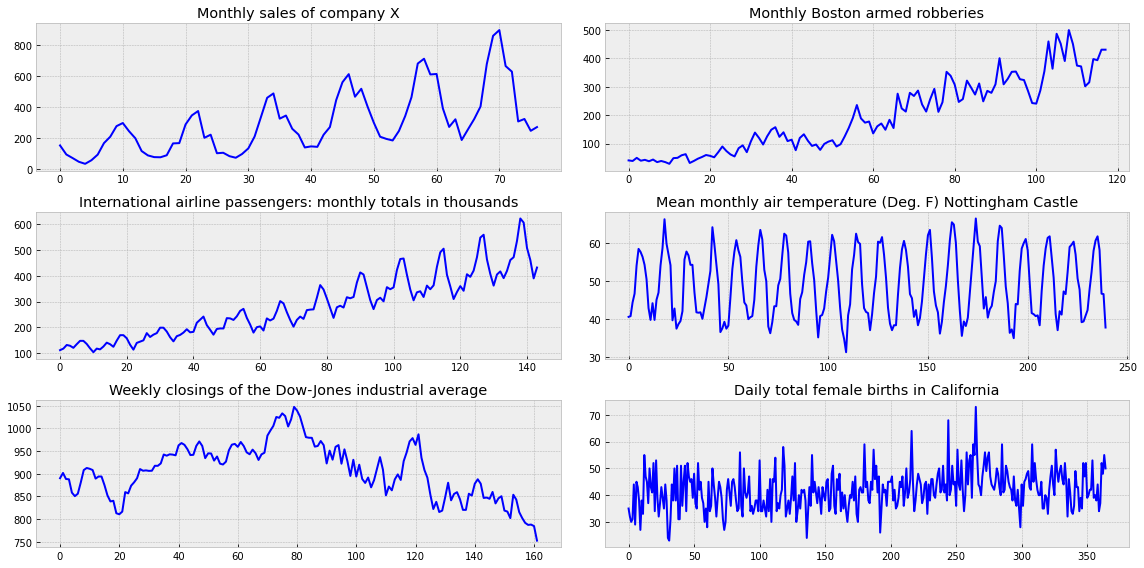

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Ищем сезонность

In [6]:
def plot_ts_and_points(ts, title, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        ts_ax.set_title(title)
        new_series.plot(ax=ts_ax, style='ro')

Построим график сезонности для каждого элемента

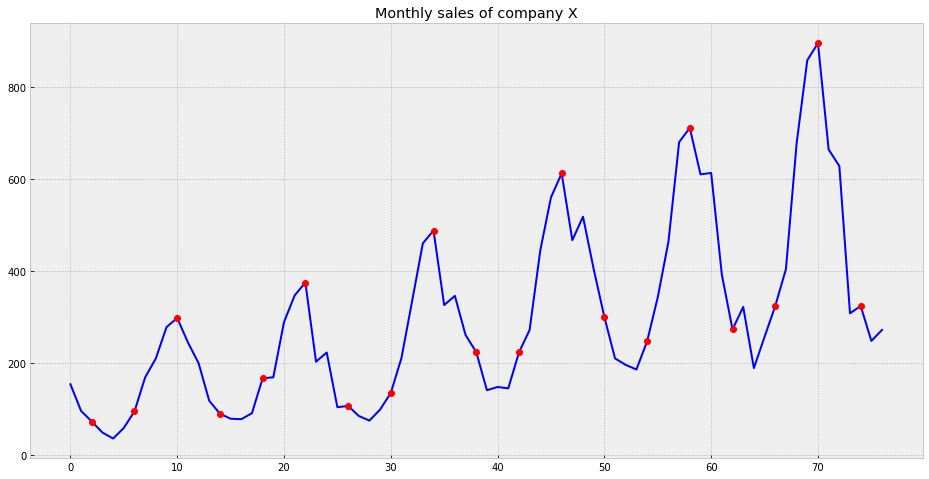

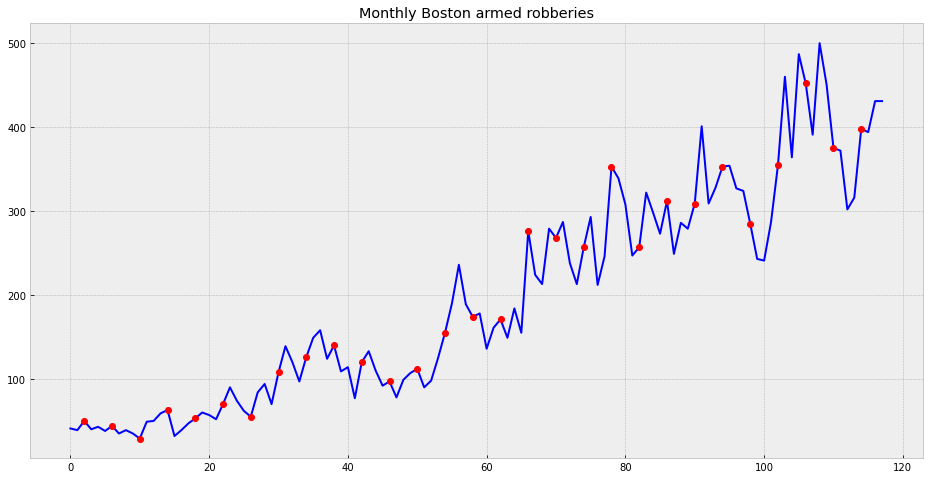

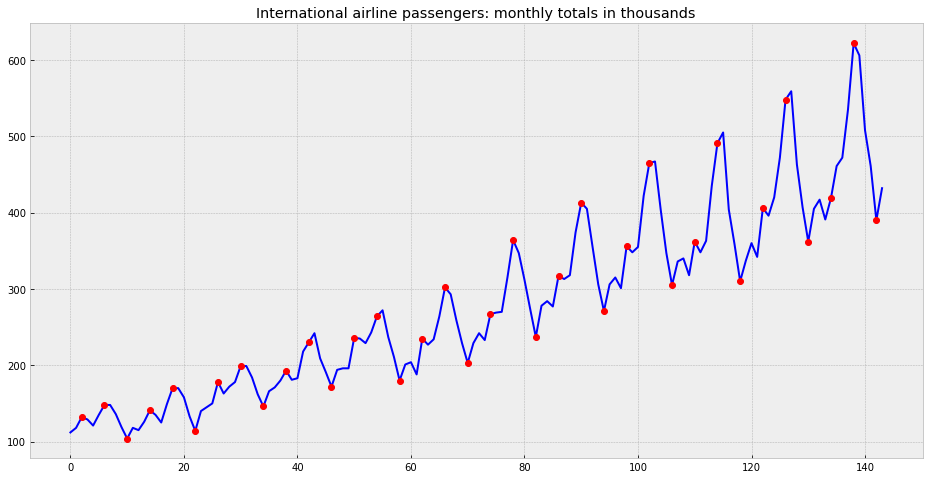

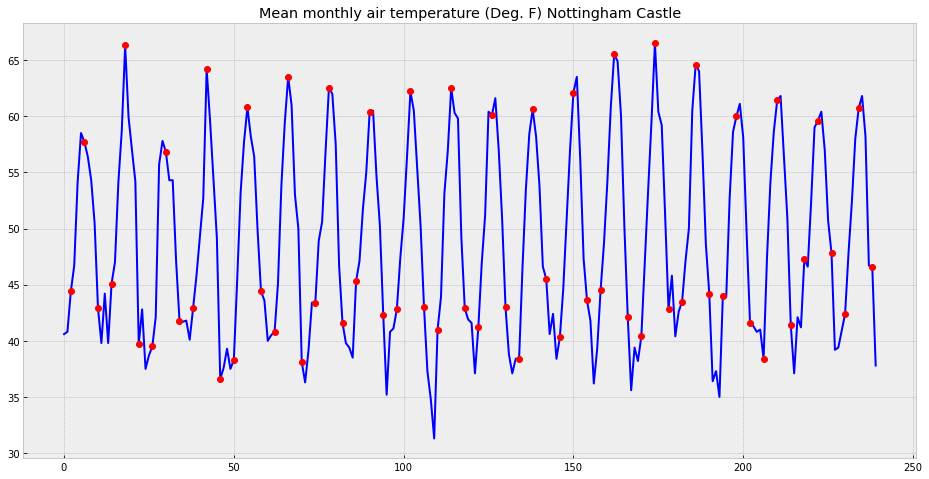

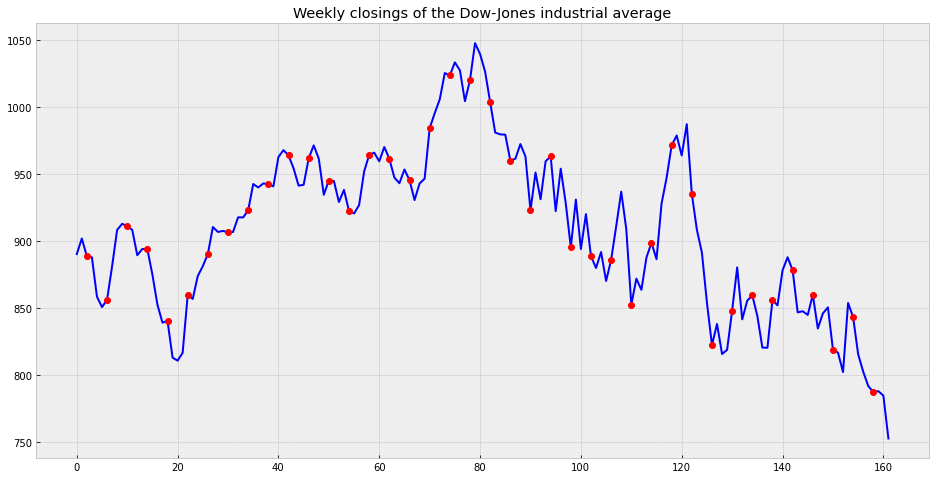

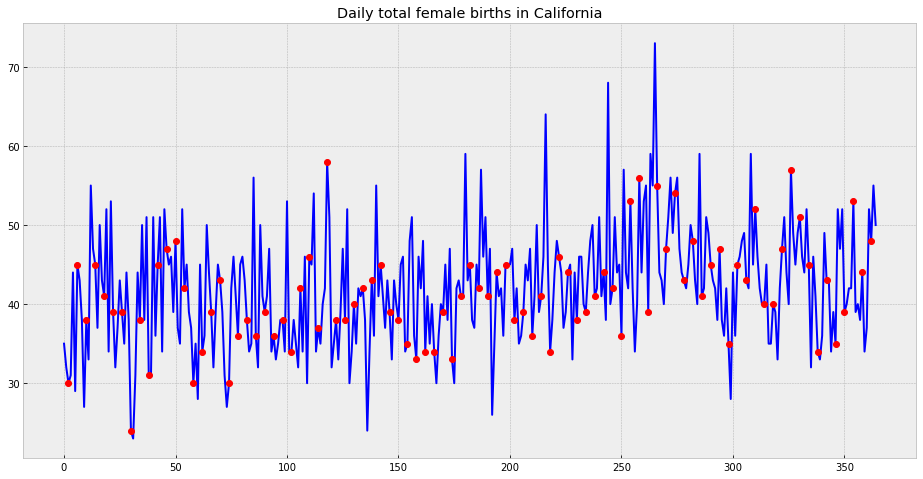

In [7]:
for i in all_series.keys():
    plot_ts_and_points(all_series[i], str(i), 2, 4)

# Нормализуем дисперсию

In [8]:
from scipy.stats import boxcox

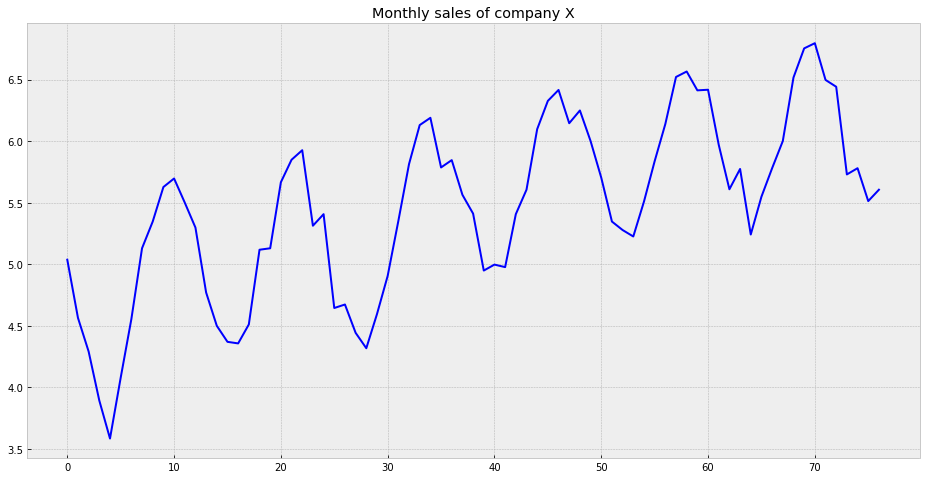

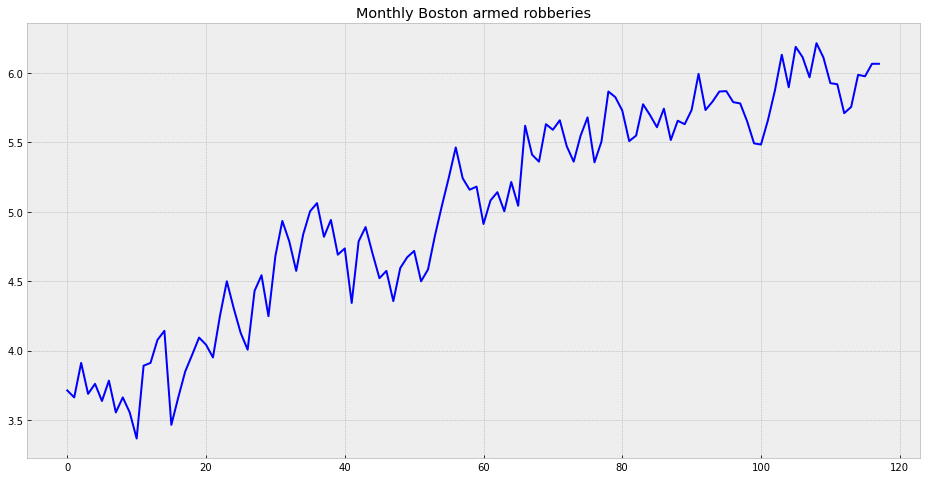

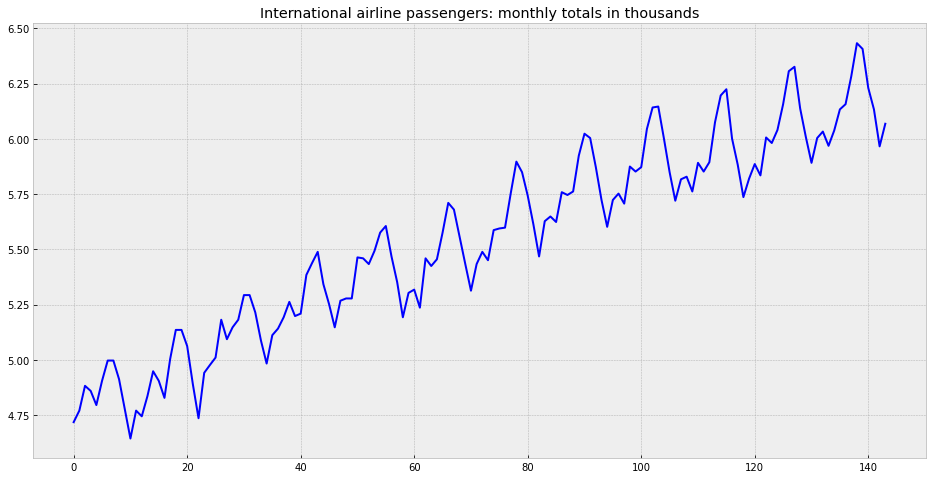

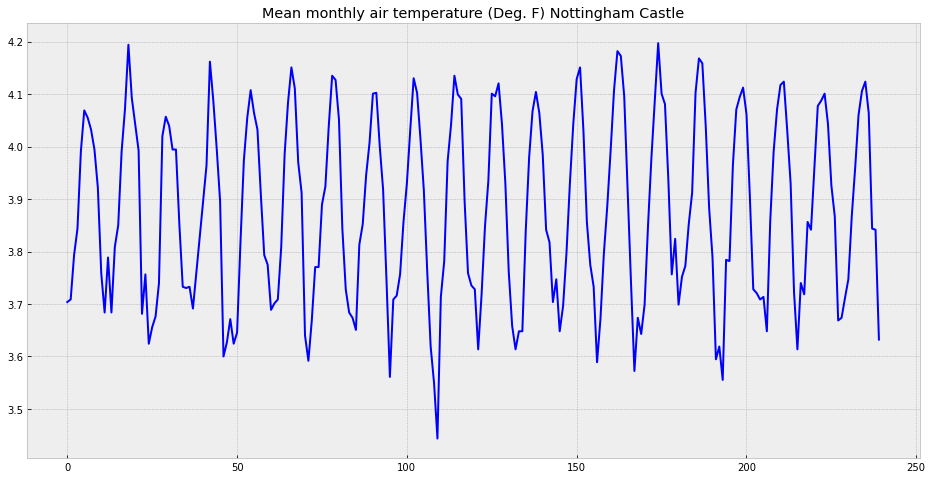

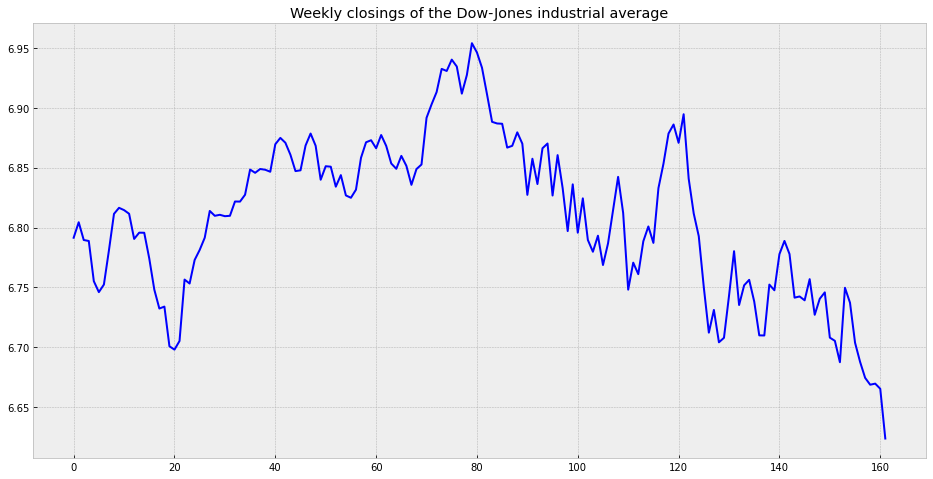

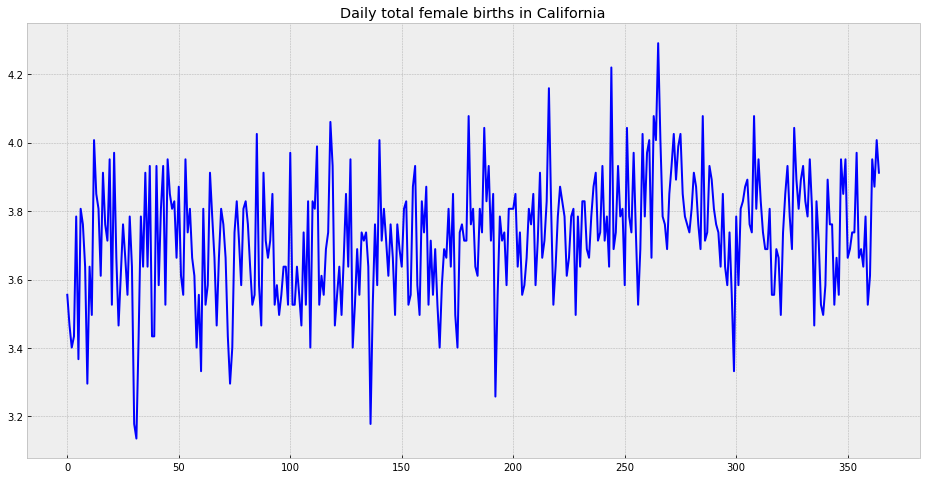

In [9]:
for i in all_series.keys():
    all_series[i] = boxcox(all_series[i], 0)
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts = all_series[i]
        plt.plot(ts, color='blue')
        ts_ax.set_title(i)

# Тест Дики-Фуллера 

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    #print(dfoutput)
    print(dfoutput['p-value']) 

In [12]:
for i in all_series.keys():
    print('For ',i,':')
    test_stationarity(all_series[i])
    print('-'*20)

For  Monthly sales of company X :
Results of Dickey-Fuller Test:
0.7853102124849118
--------------------
For  Monthly Boston armed robberies :
Results of Dickey-Fuller Test:
0.28083250354255374
--------------------
For  International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
0.42236677477038864
--------------------
For  Mean monthly air temperature (Deg. F) Nottingham Castle :
Results of Dickey-Fuller Test:
0.0033325562525331285
--------------------
For  Weekly closings of the Dow-Jones industrial average :
Results of Dickey-Fuller Test:
0.6691194827577204
--------------------
For  Daily total female births in California :
Results of Dickey-Fuller Test:
0.00035889654490253405
--------------------


In [14]:
list_to_diff = ['Monthly sales of company X', 
                'Monthly Boston armed robberies', 
                'International airline passengers: monthly totals in thousands', 
                'Weekly closings of the Dow-Jones industrial average']

Согласно тесту Дики-Фуллера: Daily total female births in California и Mean monthly air temperature (Deg. F) Nottingham Castle - СТАЦИОНАРНЫ так как p-value меньше альфа(0.05)

Их обрабатывать не нужно

# Коррелограммы

In [15]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [16]:
def tsplot(y, title, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(title)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

/Users/andreysemeshin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


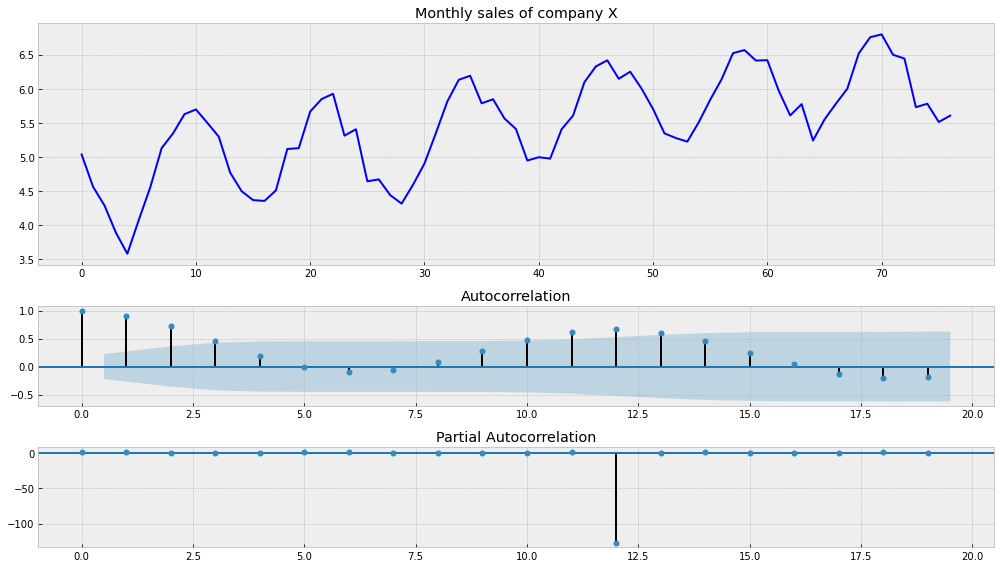

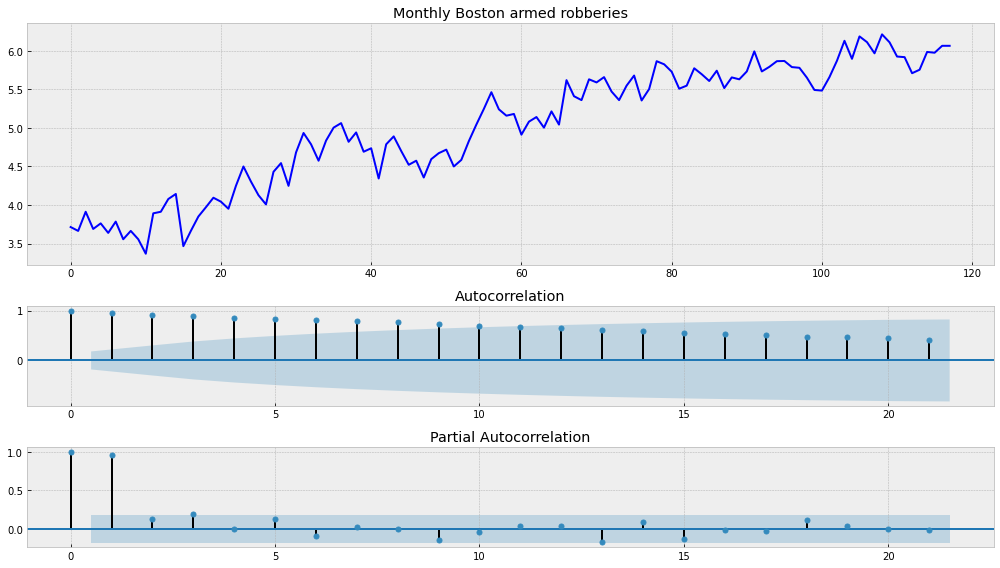

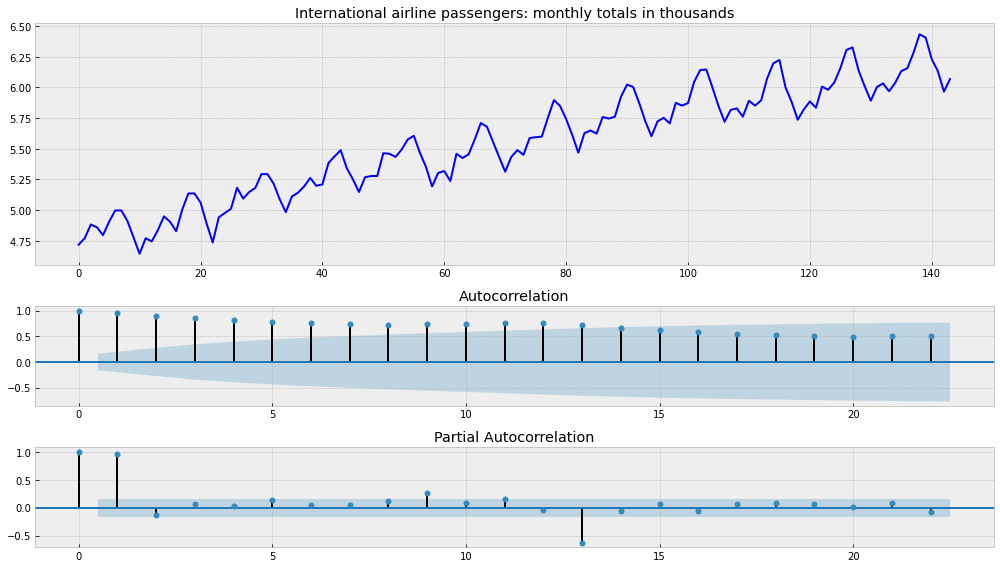

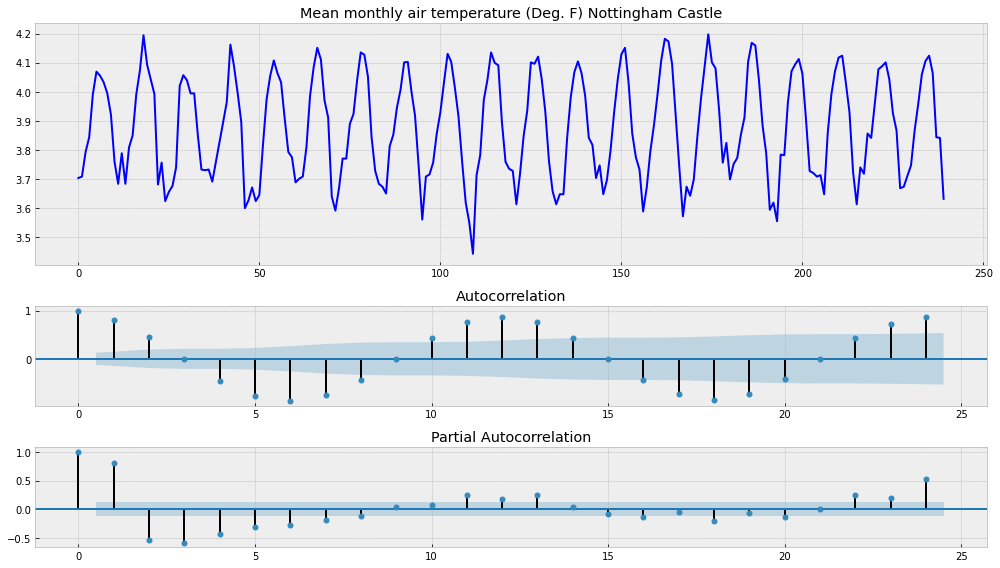

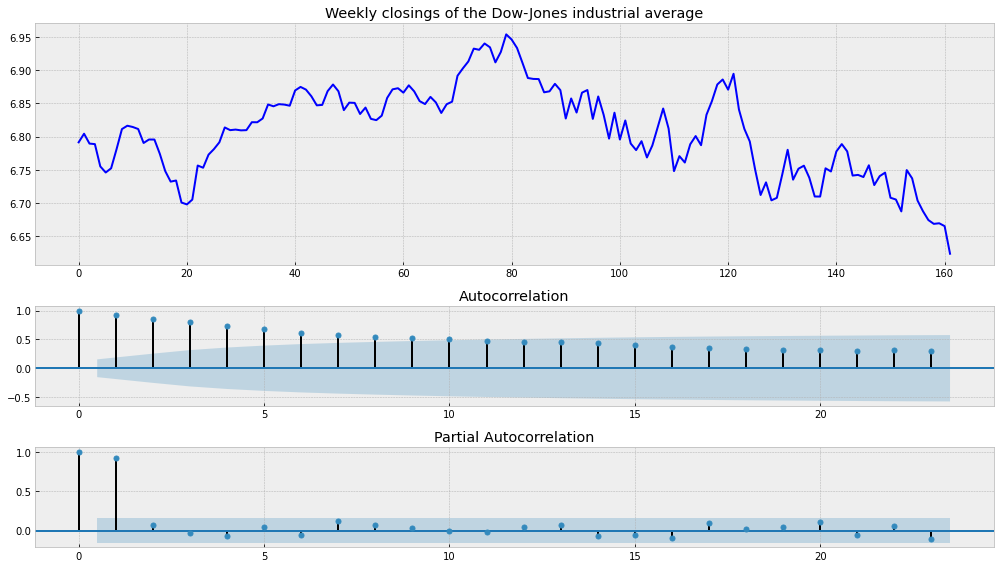

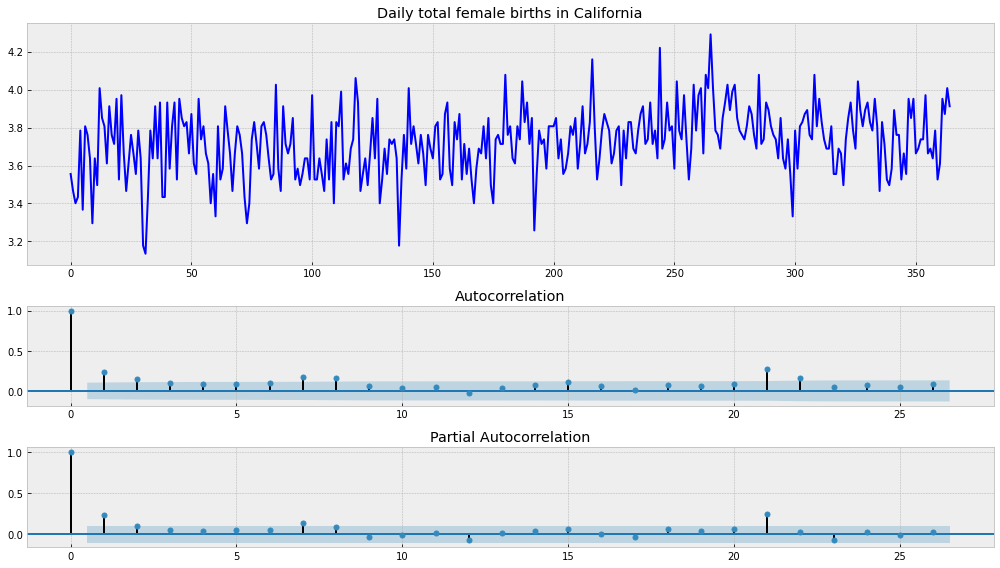

In [17]:
for i in all_series.keys():
    tsplot(all_series[i], i)

# Дифференцируем 

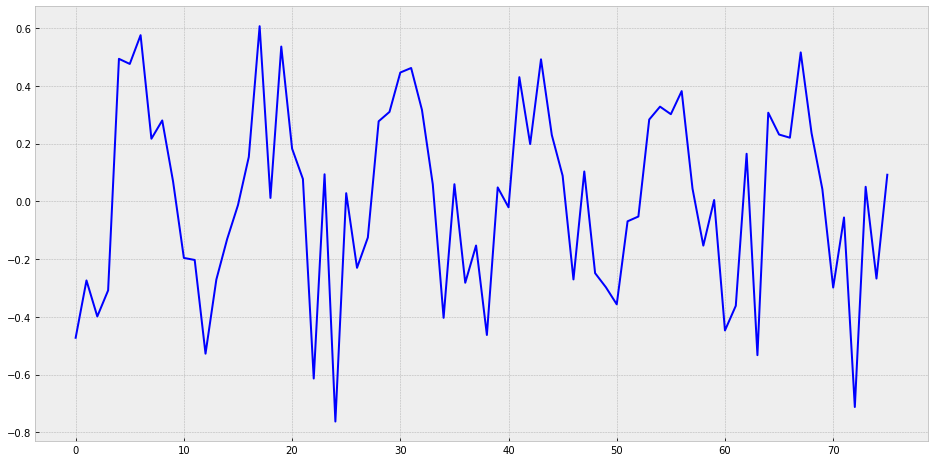

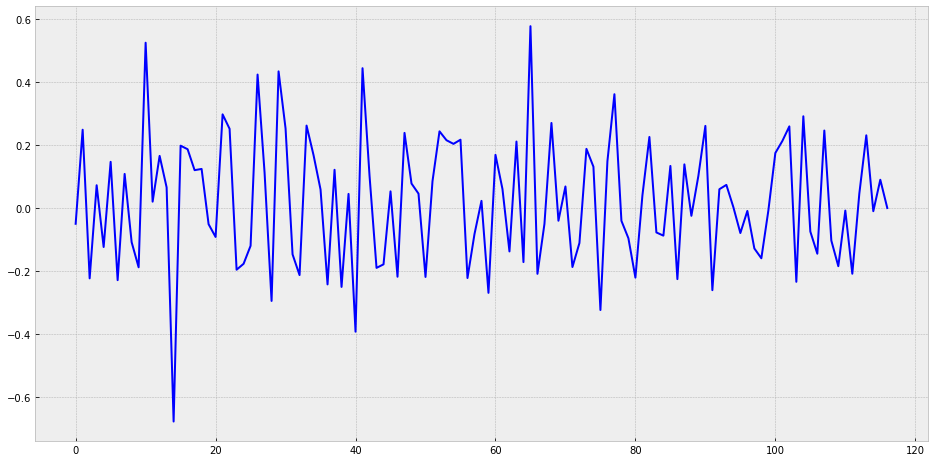

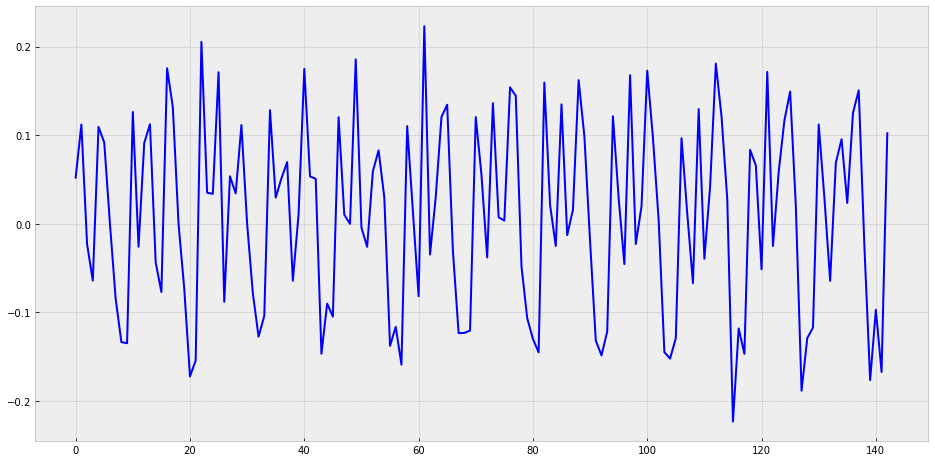

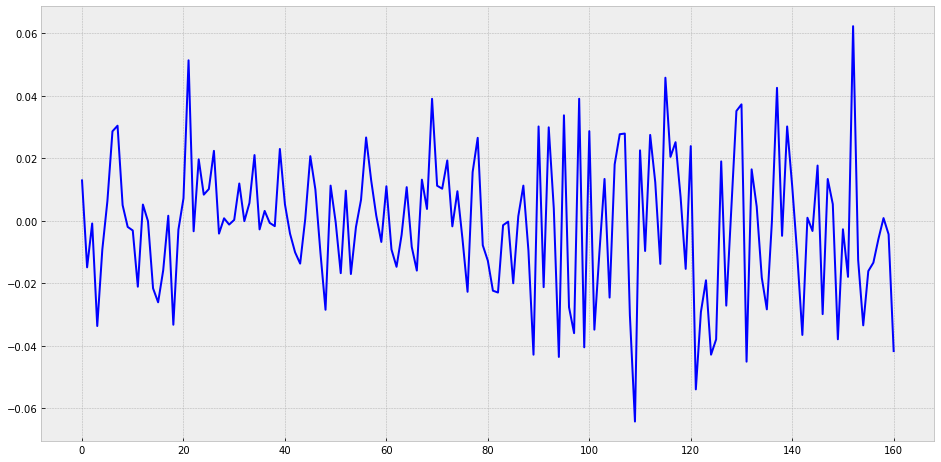

In [18]:
for i in list_to_diff:
    all_series[i] = np.diff(all_series[i], 1)

    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(all_series[i], color='blue')

Еще раз тест Дики-Фуллера
======

In [19]:
for i in list_to_diff:
    print('For ',i,':')
    test_stationarity(all_series[i])
    print('-'*20)

For  Monthly sales of company X :
Results of Dickey-Fuller Test:
0.02402539283987618
--------------------
For  Monthly Boston armed robberies :
Results of Dickey-Fuller Test:
2.3786024417436992e-11
--------------------
For  International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
0.07112054815085732
--------------------
For  Weekly closings of the Dow-Jones industrial average :
Results of Dickey-Fuller Test:
2.751609132291384e-24
--------------------


Остался один ряд, который нельзя назвать стационарыным

In [20]:
list_to_diff_2 = ['International airline passengers: monthly totals in thousands']

In [21]:
for i in list_to_diff_2:
    all_series[i] = all_series[i][1:] - all_series[i][:-1]

In [22]:
for i in list_to_diff_2:
    print('For ',i,':')
    test_stationarity(all_series[i])
    print('-'*20)

For  International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
7.419304549375512e-13
--------------------


Теперь все ряды - стационарны
========

/Users/andreysemeshin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


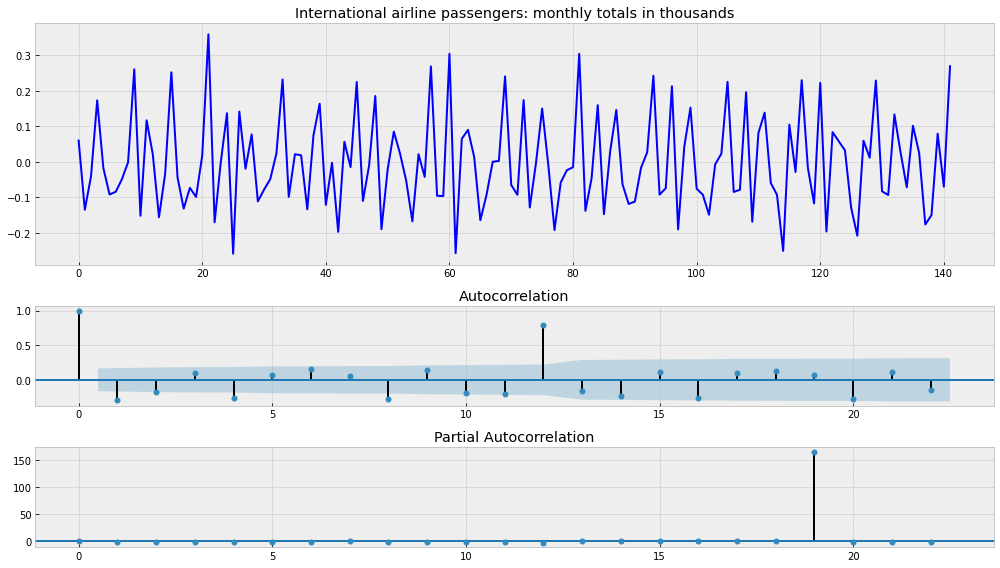

In [23]:
for i in list_to_diff_2:
    tsplot(all_series[i], i)